In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy
import scipy.signal
from mpl_toolkits import mplot3d
from functions import *
data = np.loadtxt("lff.dat")

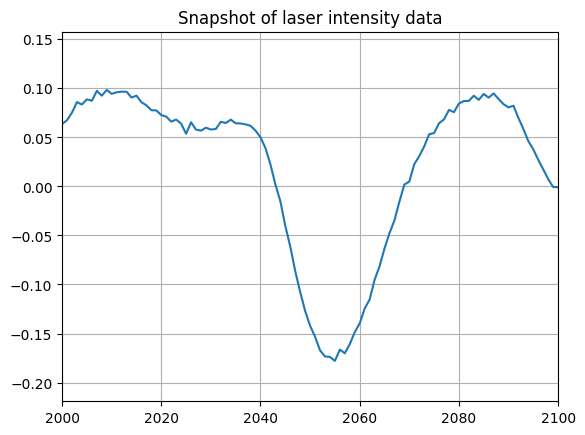

In [8]:

plt.plot(data)
plt.title("Snapshot of laser intensity data")
plt.grid()
plt.xlim((2000,2100))

plt.show()


In [10]:
# count the number of spikes 
intervals = np.diff([x for x in range(len(data)-2) if np.sign(data[x]) != np.sign(data[x+1])])
print(n:=len(intervals))

1463


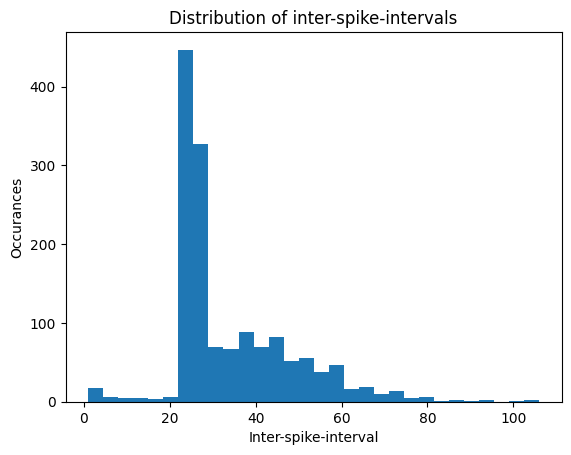

In [13]:
#Plot the histogram of data values and calculate the moments of the distribution.
plt.hist(intervals, 30)
plt.xlabel('Inter-spike-interval')
plt.ylabel('Occurances')
plt.title('Distribution of inter-spike-intervals')
plt.show()


In [14]:
#The four moments of distribution are: Mean, Variance, Skewness, Kurtosis, Coefficient of Variation

S = np.std(intervals)
median = np.median(intervals)
mean = np.mean(intervals)
variance = np.var(intervals)
skewness = scipy.stats.skew(intervals)
kurtosis = scipy.stats.kurtosis(intervals)
CoV = S/abs(mean)
print(median)
print(mean)
print(skewness)
print(kurtosis)
print(CoV)

26.0
34.133971291866025
1.248831371811103
2.087053511788559
0.416347866113205


In [ ]:
# Calculate and plot the autocorrelation function.

def ACF(data, tau):
    ACF = np.zeros(len(data))
    for x in range(len(data)-(tau+1)):
        ACF[x] = (data[x] - np.mean(data)) * (data[x+tau] - np.mean(data)) / np.std(data)**2
    plt.plot(data, ACF)
    plt.title("ACF of timeseries: tau = " + str(tau))
    plt.show()
    return ACF

[ACF(data, tau) for tau in [5, 10, 20, 40, 100]]

In [42]:
def return_map(data, tau):
    plt.rcParams["figure.figsize"] = [10.00, 7]
    plt.rcParams["figure.autolayout"] = True
    plt.plot(data[:-(tau)], data[tau:])
    plt.xlabel("$x(t)$")
    plt.ylabel("$x(t+\tau)")
    plt.title("$x_{n+1} = rx_n(1-x_n)$")
return_map(data, 26)


Error in callback <function _draw_all_if_interactive at 0x7fe0c9ec0940> (for post_execute):


AttributeError: 'LatexManager' object has no attribute 'latex'

In [44]:
(f, S) = scipy.signal.periodogram(data, 1, scaling='density')
plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,0.05])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [$V^2$/Hz]')
plt.title("FFT of laser intensity time series")
plt.show()
print(1/(ISI:=1000/14))

/var/folders/h8/b971bz894tn3xsv5xd65dq2c0000gn/T/ipykernel_39408/1347535047.py:8: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


0.014
Error in callback <function _draw_all_if_interactive at 0x7fe0c9ec0940> (for post_execute):


AttributeError: 'LatexManager' object has no attribute 'latex'

As we can see, the peak of the lower range of the PSD seems to coincide with 1/ISI, which is 0.014

Reconstruct the attractor from peaks of the PSD:

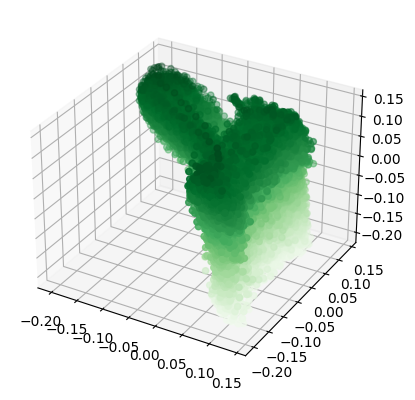

In [27]:
tau = 22

ax = plt.axes(projection='3d')

zline = data[:-(2*tau)]
xline = data[tau:-(tau)]
yline = data[2*tau:]
ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens')